Index(['url', 'short_url', 'sub_domain', 'favicon', 'ip', 'href_count',
       'state_code', 'url_length', 'ssl', 'page_redirect', 'meta_data',
       'url_split_count', 'url_at_sign', 'dash_count', 'url_rank',
       'email_count', 'name_server_count', 'status_count', 'domain_time',
       'activeDuration', 'domain_name_count', 'domain_name_len', 'label'],
      dtype='object')
[LightGBM] [Warning] Unknown parameter: n_estimaors
테스트 세트의 정확도: 0.95


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

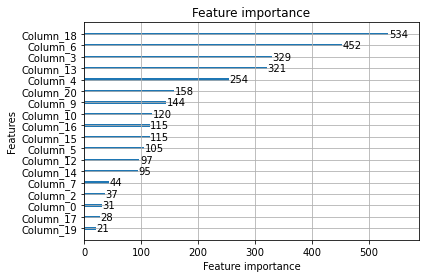

In [1]:
#라이브러리 호출
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plot_importance
import lightgbm as lgb
import numpy as np
import pandas as pd
%matplotlib inline

train_dataset = pd.read_csv('label_data.csv')
print(train_dataset.columns)
ftr = np.array(train_dataset.iloc[:, 1:-1].values)
target = np.array(train_dataset.iloc[:, -1].values)
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.3, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimaors =400)
lgbm_wrapper.fit(X_train, y_train)

pred = lgbm_wrapper.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("테스트 세트의 정확도: {:.2f}".format(accuracy))

lgb.plot_importance(lgbm_wrapper)
